# Godview

Prerequisite:
- knowing all possible labels
- knowing everything that happened and will happen in the video for every frame
- knowing the meanings of all labels.

In [1]:
import numpy as np
import pandas as pd

import cratutils as u
import godutils as g

import importlib
importlib.reload(u)
importlib.reload(g)

<module 'godutils' from '/Users/yx/Documents/pro/crat/godcrat/godutils.py'>

Videos is a map of filename to list

Each list represents a video (list of frames)

Each frame is a dataframe of agent information

`Map<String, List<DataFrame>> video;`

In [2]:
# # Run this only once
# u.WriteRawDataToCache(includeInvalid=True)

In [3]:
videos = u.GetCachedRawVideos()

In [6]:
importlib.reload(u)
videos['0.csv'][0].head()

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,V_X,V_Y,A_X,A_Y,YAW,DYAW,DDYAW,first_class,second_class,third_class,fileName
518898,1.630377e+09,ego,0,0.000000,0.000000,-0.066663,10.075352,-0.273077,0.041434,0.000000,1.718444,-0.313116,0,0,1,0.csv
518899,1.630377e+09,scene-000000-1,2,-3.956840,2.794453,-0.316424,17.446817,0.267046,0.178962,1.522354,-0.888693,-1.126752,0,0,1,0.csv
518900,1.630377e+09,scene-000000-2,2,-0.133549,-16.591239,0.300762,10.282932,-0.347223,0.073741,356.251778,6.214802,-4.810373,0,0,1,0.csv
518901,1.630377e+09,scene-000000-3,2,-4.378153,27.572297,-0.966180,16.985848,1.258668,-0.300079,2.690841,-0.663327,2.067720,0,0,1,0.csv
518902,1.630377e+09,scene-000000-4,2,-2.816514,-24.751882,-0.320676,15.035509,0.581560,-0.243673,1.445300,1.827755,-0.423362,0,0,1,0.csv


1.1.5 LeadVehicleStppoed
False
True
9.9.9 Invalid


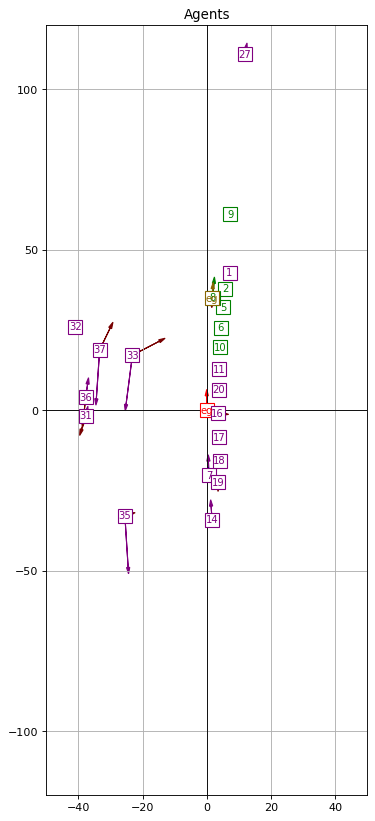

In [166]:
importlib.reload(u)
importlib.reload(g)

file = '2.csv'
ti = 0


vid = g.Trajectories(videos[file])
lbs = u.GetTrueLabels(file)
label = lbs[ti]

# print label
try: print(u.thirdClassNames[label])
except: print("INVALID")

# print what you need
slf: g.Agent = vid.getAgentByCode(ti, 8)
ego: g.Agent = vid.getEgo(ti+15)
dx = slf.x - ego.x; dy = slf.y - ego.y
p = [
    # dx,dy,
    slf.isLeadingDirectly(ego),
    slf.matchAnchorAsLeading(ego),
    u.thirdClassNames[g.ClassifyInLaneFrame(ti, vid)],
    # list(map(lambda a:a.id, vid.getNonEgoAgents(ti)))
    # videos[file][ti].drop(columns=['TIMESTAMP'])
]
for pi in p: print(pi)

# plot situation
vid.plot(ti, extra=[ego], greenOnly=0, a=1, bigA=False, ysize=120, dpi=80, onlyCars=True)

In [118]:
a = pd.Series(['apple', 'lemon', 'mango'])
a.apply(lambda x : 'a' in x)

0     True
1    False
2     True
dtype: bool